In [1]:
import sys, os
from cProfile import label

import numpy as np
import matplotlib.pyplot as plt
import warnings
from scipy.constants import c


In [525]:
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python')
sys.path.append('C:\\Program Files\\Lumerical\\v221\\api\\python\\lumapi.py')

In [526]:
warnings.filterwarnings("ignore", category=SyntaxWarning)
import lumapi

In [4]:
nm = 1e-9
um = 1e-6


In [528]:
icApi = lumapi.INTERCONNECT()

In [529]:
icApi.switchtolayout()
icApi.deleteall()

Adding devices

In [530]:
#ONA
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')

In [5]:
delta = [((1550e-9)**2)/(4.3455*1e-9), ((1550e-9)**2)/(4.3455*10e-9), ((1550e-9)**2)/(4.3455*20e-9)]

In [7]:
print(delta[0]/um, delta[1]/um, delta[2]/um)

552.8707858704406 55.287078587044064 27.643539293522032


In [533]:
#delta = ((1550e-9)**2)/(4.3455*1e-9)
#waveguides
icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg1')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', 100*um)
icApi.set('effective index 1', 2.355)
icApi.set('group index 1', 4.355)


icApi.addelement('Straight Waveguide')
icApi.set('name', 'wg2')
icApi.set('frequency', (c/(1550*nm)))
icApi.set('length', (100*um + delta[0]))
icApi.set('effective index 1', 2.355)
icApi.set('group index 1', 4.355)



In [534]:
print(((1550e-9)**2)/(4.3455*1e-9)/um)

552.8707858704406


In [535]:
#Y branches
icApi.addelement('Waveguide Y Branch')
icApi.set('name', 'yb1')
icApi.addelement('Waveguide Y Branch')
icApi.set('name', 'yb2')
icApi.rotateelement('yb2')
icApi.rotateelement('yb2')

In [536]:
#positions
icApi.setposition('ona1',-20,-200)
icApi.setposition('wg1',0,0)
icApi.setposition('wg2',0,150)
icApi.setposition('yb1',-250,75)
icApi.setposition('yb2',250,75)

In [537]:
#conections
icApi.connect('ona1','output', 'yb1', 'port 1')

icApi.connect('yb1', 'port 2', 'wg1', 'port 1')
icApi.connect('yb1', 'port 3', 'wg2', 'port 1')

icApi.connect('wg1', 'port 2', 'yb2', 'port 3')
icApi.connect('wg2', 'port 2', 'yb2', 'port 2')

icApi.connect('yb2', 'port 1', 'ona1', 'input 1')


1.0

In [538]:
icApi.switchtolayout()
icApi.select('ona1')
icApi.set('number of points', 10000)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

In [539]:
icApi.run()

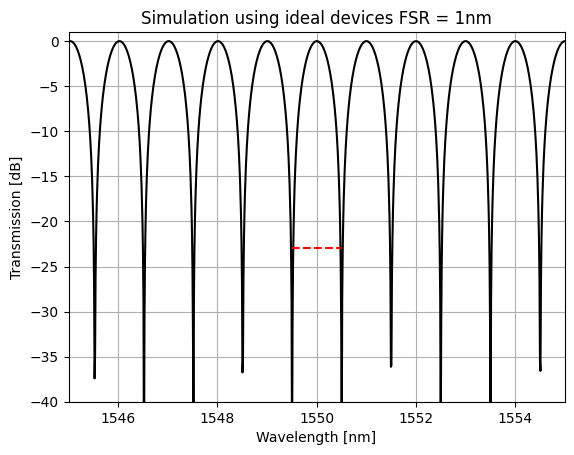

In [540]:
data = icApi.getresult('ona1', 'input 1/mode 1/gain')
#print(data)
#print((data['wavelength']))
plt.plot(data['wavelength']/nm, data['TE gain (dB)'],color='black')
#plt.plot(data['wavelength']/nm, data['mode 1 gain (dB)'])
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r',linestyles='dashed')
#plt.arrow(1549.5, -20, 1550.5, 1, color='red', head_length = 0.07, head_width = 0.025, length_includes_head = True)
plt.xlim(1545, 1555)
plt.ylim(-40, 1)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 1nm')
plt.savefig('Simulation using ideal devices FSR = 1nm.png')

In [541]:
delta2 = ((1550e-9)**2)/(4.3455*10e-9)
icApi.switchtolayout()
icApi.select('wg2')
icApi.set('length', (100*um +delta[1]))

In [542]:
icApi.run()

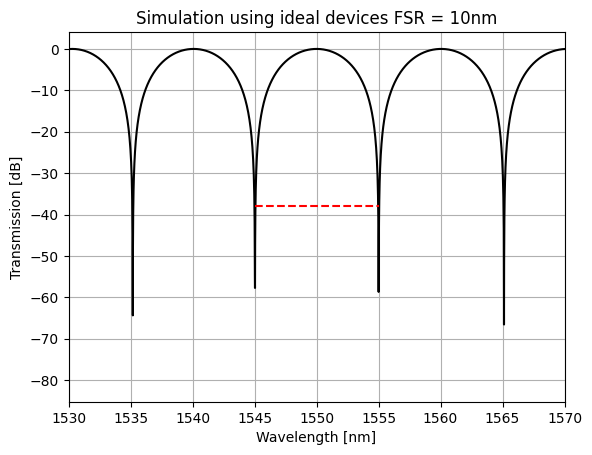

In [543]:
data2 = icApi.getresult('ona1', 'input 1/mode 1/gain')
#print(data)
#print((data['wavelength']))

plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],color='black')
#plt.plot(data['wavelength']/nm, data['mode 1 gain (dB)']) #for S parameters devices
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-38,xmin=1545,xmax=1555, color='r', linestyles='dashed')
#plt.xlim(1545, 1555)
plt.xlim(1530, 1570)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 10nm')
plt.savefig('Simulation using ideal devices FSR = 10nm.png')

In [544]:
delta3 = ((1550e-9)**2)/(4.3455*20e-9)
icApi.switchtolayout()
icApi.select('wg2')
icApi.set('length', (100*um +delta3))
icApi.run()

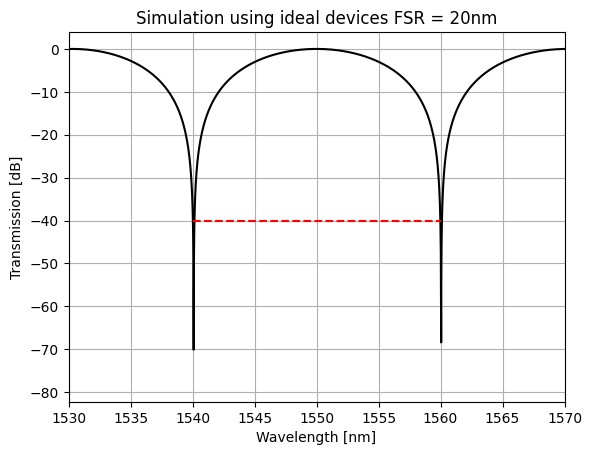

In [545]:
data3 = icApi.getresult('ona1', 'input 1/mode 1/gain')

plt.plot(data3['wavelength']/nm, data3['TE gain (dB)'],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
#plt.hlines(-38,xmin=1545,xmax=1555, color='b')
plt.hlines(-40,xmin=1540,xmax=1560, color='r',linestyles='dashed')
#plt.xlim(1545, 1555)
plt.xlim(1530, 1570)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using ideal devices FSR = 20nm')
plt.savefig('Simulation using ideal devices FSR = 20nm.png')

<h1>Simulation using PDK</h1>


In [579]:
icApi.switchtolayout()
icApi.deleteall()
icApi.expressioncheckoff()  

icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.addelement('ebeam_y_1550')
icApi.set('name', 'yb1')
icApi.addelement('ebeam_y_1550')
icApi.set('name', 'yb2')
icApi.rotateelement('yb2')
icApi.rotateelement('yb2')
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg1')
icApi.addelement('ebeam_wg_integral_1550')
icApi.set('name', 'wg2')

In [580]:
#positions
icApi.setposition('ona1',-20,-200)
icApi.setposition('wg1',0,0)
icApi.setposition('wg2',0,150)
icApi.setposition('yb1',-250,75)
icApi.setposition('yb2',250,75)

In [581]:
#conections
icApi.connect('ona1','output', 'yb1', 'opt_a1')

icApi.connect('yb1', 'opt_b1', 'wg1', 'port 1')
icApi.connect('yb1', 'opt_b2', 'wg2', 'port 1')

icApi.connect('wg1', 'port 2', 'yb2', 'opt_b2')
icApi.connect('wg2', 'port 2', 'yb2', 'opt_b1')

icApi.connect('yb2', 'opt_a1', 'ona1', 'input 1')


1.0

In [582]:
#ng@500nm = 4.19088
#ng@450nm = 4.284379375
delta4 = ((1550e-9)**2)/(4.284379375*1e-9)
icApi.switchtolayout()
icApi.set('wg_width', 450*nm)
icApi.select('wg1')
icApi.set('wg_width', 450*nm)
icApi.select('wg2')
icApi.set('wg_length', (100*um +delta4))

In [583]:
icApi.switchtolayout()
icApi.select('ona1')
icApi.set('number of points', 10000)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

In [584]:
icApi.run()

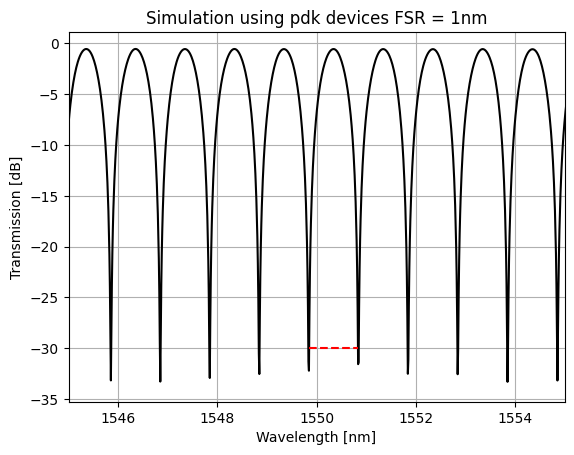

In [594]:
data4 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1549.84
plt.plot(data4['wavelength']/nm, data4["'TE' gain (dB)"],color='black')
#plt.vlines(1549.85,ymin=-60,ymax=0, color='r',linestyles='dashed')
#plt.vlines(1550.85,ymin=-60,ymax=0, color='r',linestyles='dashed')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-30,xmin=fc1,xmax=fc1+1, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
plt.xlim(1545, 1555)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
#plt.xlim(1548, 1552)
plt.title('Simulation using pdk devices FSR = 1nm')
plt.savefig('Simulation using pdk devices FSR = 1nm.png')

In [553]:
icApi.switchtolayout()
delta5 = ((1550e-9)**2)/(4.284379375*10e-9)
icApi.select('wg2')
icApi.set('wg_length', (100*um +delta5))

In [554]:
icApi.run()

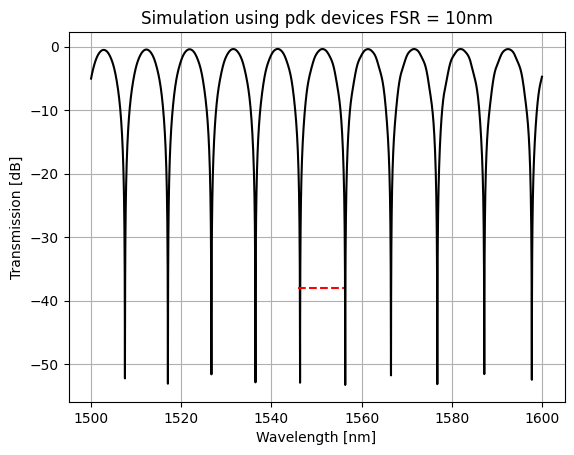

In [555]:
datapdk10 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1546
#plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'])
plt.plot(datapdk10['wavelength']/nm, datapdk10["'TE' gain (dB)"],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-38,xmin=fc1,xmax=fc1+10, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
#plt.xlim(1540, 1560)
#plt.xlim(1548, 1552)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using pdk devices FSR = 10nm')
plt.savefig('Simulation using pdk devices FSR = 10nm.png')

Simulation with S parameters

In [595]:
icApi.switchtolayout()
delta6 = ((1550e-9)**2)/(4.284379375*20e-9)
icApi.select('wg2')
icApi.set('wg_length', (100*um +delta6))

In [596]:
icApi.run()

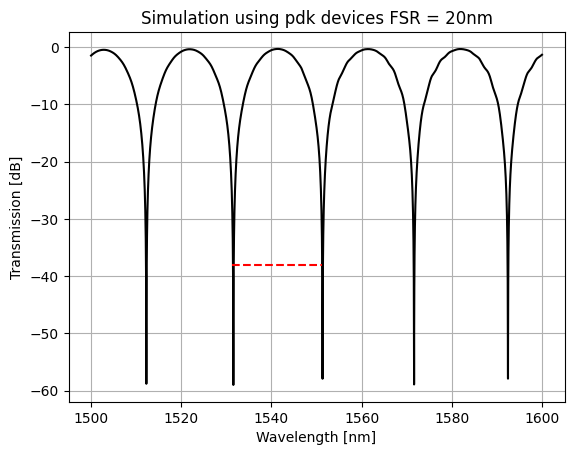

In [598]:
data5 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1531.3
#plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'])
plt.plot(data5['wavelength']/nm, data5["'TE' gain (dB)"],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-38,xmin=fc1,xmax=fc1+20, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
#plt.xlim(1540, 1560)
#plt.xlim(1548, 1552)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using pdk devices FSR = 20nm')
plt.savefig('Simulation using pdk devices FSR = 20nm.png')

<h1>Simulation with S parameters</h1>

In [559]:
icApi.switchtolayout()
icApi.deleteall()

In [560]:
icApi.addelement('Optical Network Analyzer')
icApi.set('name', 'ona1')
icApi.addelement('Optical N Port S-Parameter')
icApi.set('name', 'yb1')
icApi.set('load from file',1)
icApi.set('s parameters filename','C:\\Users\\luciv\\Documents\\Lucivaldo\\Lab_Y_branch\\y_branch_bend_TE.dat')

icApi.addelement('Optical N Port S-Parameter')
icApi.set('name', 'yb2')
icApi.set('load from file',1)
icApi.set('s parameters filename','C:\\Users\\luciv\\Documents\\Lucivaldo\\Lab_Y_branch\\y_branch_bend_TE.dat')
icApi.rotateelement('yb2')
icApi.rotateelement('yb2')
#waveguides 


In [561]:
icApi.addelement('MODE waveguide')
icApi.set('name', 'wg1')
icApi.set('length', 100*um)
icApi.set('ldf filename','wgd2.ldf')

icApi.addelement('MODE waveguide')
icApi.set('name', 'wg2')
icApi.set('length', (100*um + delta[0]))
icApi.set('ldf filename','wgd2.ldf')

In [562]:
icApi.select('ona1')
icApi.set('number of points', 10000)
icApi.set('input parameter', 2)
icApi.set('start frequency', (c/(1500*nm)))
icApi.set('stop frequency', (c/(1600*nm)))

In [563]:
#positions
icApi.setposition('ona1',-20,-200)
icApi.setposition('wg1',0,0)
icApi.setposition('wg2',0,150)
icApi.setposition('yb1',-250,75)
icApi.setposition('yb2',250,75)

In [564]:
#conections
icApi.connect('ona1','output', 'yb1', 'port 1')

icApi.connect('yb1', 'port 2', 'wg1', 'port 1')
icApi.connect('yb1', 'port 3', 'wg2', 'port 1')

icApi.connect('wg1', 'port 2', 'yb2', 'port 3')
icApi.connect('wg2', 'port 2', 'yb2', 'port 2')

icApi.connect('yb2', 'port 1', 'ona1', 'input 1')

1.0

In [565]:
icApi.save('Sparameters-1nm')

In [566]:
icApi.run()

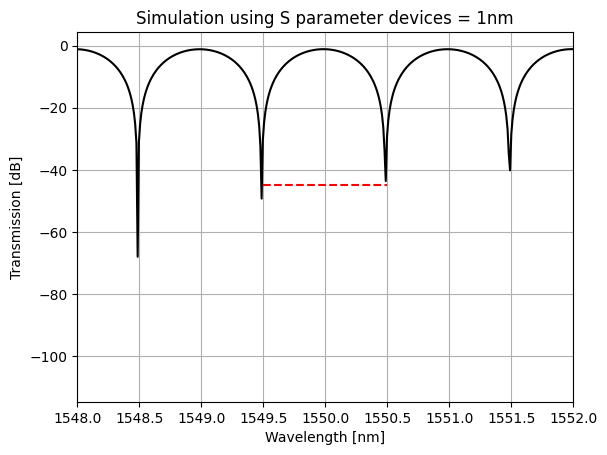

In [567]:
data6 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1549.5
#plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'])
plt.plot(data6['wavelength']/nm, data6["mode 1 gain (dB)"],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-45,xmin=fc1,xmax=fc1+1, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
#plt.xlim(1540, 1560)
plt.xlim(1548, 1552)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using S parameter devices = 1nm')
plt.savefig('Simulation using S parameter devices = 1nm.png')

In [568]:
icApi.switchtolayout()
icApi.select('wg2')
icApi.set('length', (100*um +delta[1]))

In [569]:
icApi.run()

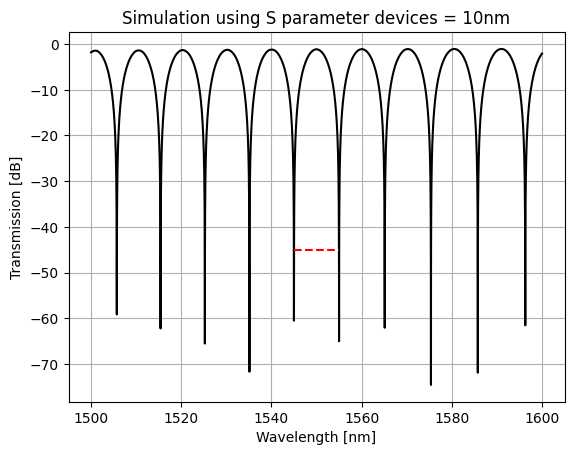

In [570]:
data7 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1545
#plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'])
plt.plot(data7['wavelength']/nm, data7["mode 1 gain (dB)"],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-45,xmin=fc1,xmax=fc1+10, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
#plt.xlim(1540, 1560)
#plt.xlim(1548, 1552)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using S parameter devices = 10nm')
plt.savefig('Simulation using S parameter devices = 10nm.png')

In [571]:
icApi.switchtolayout()
icApi.select('wg2')
icApi.set('length', (100*um +delta[2]))

In [572]:
icApi.run()

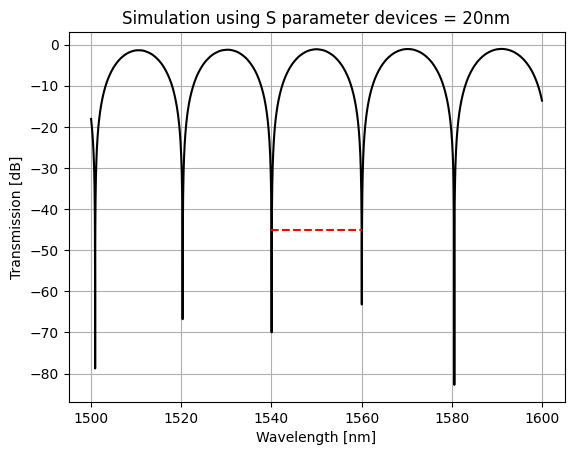

In [573]:
data8 = icApi.getresult('ona1', 'input 1/mode 1/gain')
fc1 = 1540
#plt.plot(data4['wavelength']/nm, data4['TE gain (dB)'])
plt.plot(data8['wavelength']/nm, data8["mode 1 gain (dB)"],color='black')
#plt.vlines(1550,ymin=-60,ymax=0, color='r')
#plt.hlines(-23,xmin=1549.5,xmax=1550.5, color='r')
plt.hlines(-45,xmin=fc1,xmax=fc1+20, color='r',linestyles='dashed')
#plt.hlines(-45,xmin=1545,xmax=1555, color='g')
#plt.xlim(1540, 1560)
#plt.xlim(1548, 1552)
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.grid()
plt.title('Simulation using S parameter devices = 20nm')
plt.savefig('Simulation using S parameter devices = 20nm.png')

<h1>Variação do comprimento</h1>

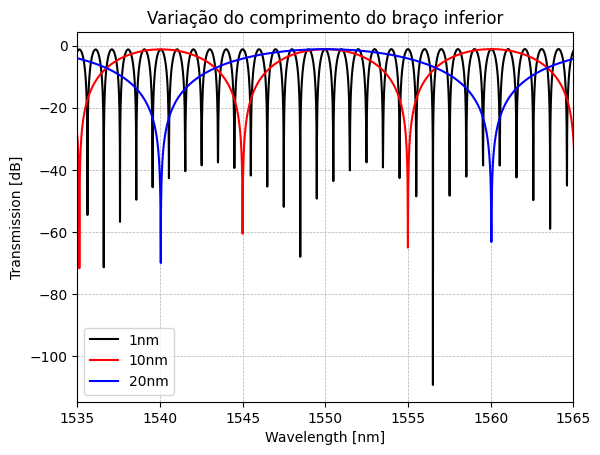

In [574]:
plt.plot(data6['wavelength']/nm, data6["mode 1 gain (dB)"], label='1nm', color='black')
plt.plot(data7['wavelength']/nm, data7["mode 1 gain (dB)"], label='10nm', color='red')
plt.plot(data8['wavelength']/nm, data8["mode 1 gain (dB)"], label='20nm', color='blue')
plt.legend()
plt.xlim(1535,1565)
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('Variação do comprimento do braço inferior')
plt.xlabel('Wavelength [nm]')
plt.ylabel('Transmission [dB]')
plt.savefig('variacao.png')

<h1>Comparação tecnologias</h1>

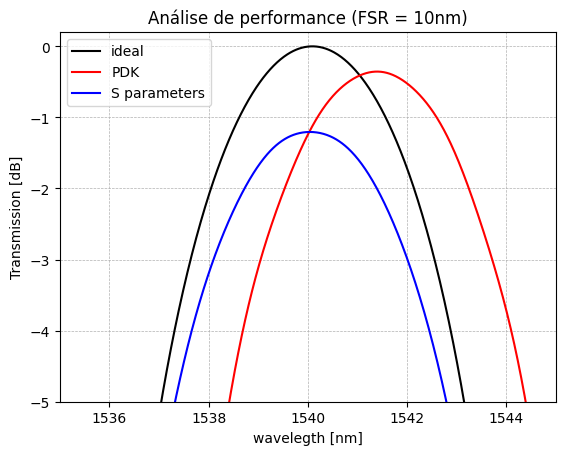

In [577]:
plt.plot(data2['wavelength']/nm, data2['TE gain (dB)'],label='ideal', color='black')
plt.plot(datapdk10['wavelength']/nm, datapdk10["'TE' gain (dB)"],label='PDK', color='red')
plt.plot(data7['wavelength']/nm, data7["mode 1 gain (dB)"], label='S parameters', color='blue')
plt.legend()
plt.grid(which='both', axis='both', linestyle='--', linewidth=0.5)
plt.title('Análise de performance (FSR = 10nm)')
plt.xlabel('wavelegth [nm]')
plt.ylabel('Transmission [dB]')
plt.ylim(-5,0.2)
plt.xlim(1535,1545)
plt.savefig('performance.png')